Nama: Muhammad Abdal Rizky\
NIM: 2309106012

# Posttest 2

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.decomposition import PCA

In [114]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
numeric_df = df.select_dtypes(include=np.number)

### 1. Tampilkan rata-rata, standar deviasi, nilai minimum, nilai maksimum, Q1, Q2, dan Q3 dari attribute bertipe angka.

In [115]:
descriptive_stats = numeric_df.describe()
print("Statistik Deskriptif untuk Atribut Numerik:")
print(descriptive_stats)

Statistik Deskriptif untuk Atribut Numerik:
        Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3

### 2. Tampilkan 10 record pertama dari dataset dengan attribute bertipe angka.

In [116]:
numeric_df.head(10)

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,1,27,6.1,6,42,6,77,4200
1,2,28,6.2,6,60,8,75,10000
2,3,28,6.2,6,60,8,75,10000
3,4,28,5.9,4,30,8,85,3000
4,5,28,5.9,4,30,8,85,3000
5,6,28,5.9,4,30,8,85,3000
6,7,29,6.3,6,40,7,82,3500
7,8,29,7.8,7,75,6,70,8000
8,9,29,7.8,7,75,6,70,8000
9,10,29,7.8,7,75,6,70,8000


### 3. Tampilkan informasi jumlah record, jumlah attribute, nama attribute, jumlah attribute dengan tipe angka.

In [117]:
jumlah_record = df.shape[0]
jumlah_attribute = df.shape[1]
nama_attribute = df.columns.tolist()
jumlah_attribute_angka = numeric_df.shape[1]
print(f"Jumlah Record: {jumlah_record}")
print(f"Jumlah Attribute: {jumlah_attribute}")
print(f"Nama Attribute: {nama_attribute}")
print(f"Jumlah Attribute dengan Tipe Angka: {jumlah_attribute_angka}")

Jumlah Record: 374
Jumlah Attribute: 13
Nama Attribute: ['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']
Jumlah Attribute dengan Tipe Angka: 8


### 4. Tampilkan jumlah label dari semua attribute yang bernilai object (contoh : Jenis Kelamin, Agama).

In [118]:
object_df = df.select_dtypes(include=['object'])
print("Jumlah Label dari Semua Attribute Bertipe Object:")
for column in object_df.columns:
    print(f"Attribute: {column}")
    print(object_df[column].value_counts())

Jumlah Label dari Semua Attribute Bertipe Object:
Attribute: Gender
Gender
Male      189
Female    185
Name: count, dtype: int64
Attribute: Occupation
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64
Attribute: BMI Category
BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64
Attribute: Blood Pressure
Blood Pressure
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
128/85     3
132/87     3
117/76     2
130/86     2
126/83     2
119/77     2
135/88     2
128/84     2
131/86     2
139/91     2
115/78     2
129/84     2
142/92     2
118/75     2
118/76     1
122/80     1
121/79     1
Na

### 5. Visualisasikan dataset dengan salah satu grafik. Pilih grafik yang paling cocok untuk memvisualisasikan data tersebut.

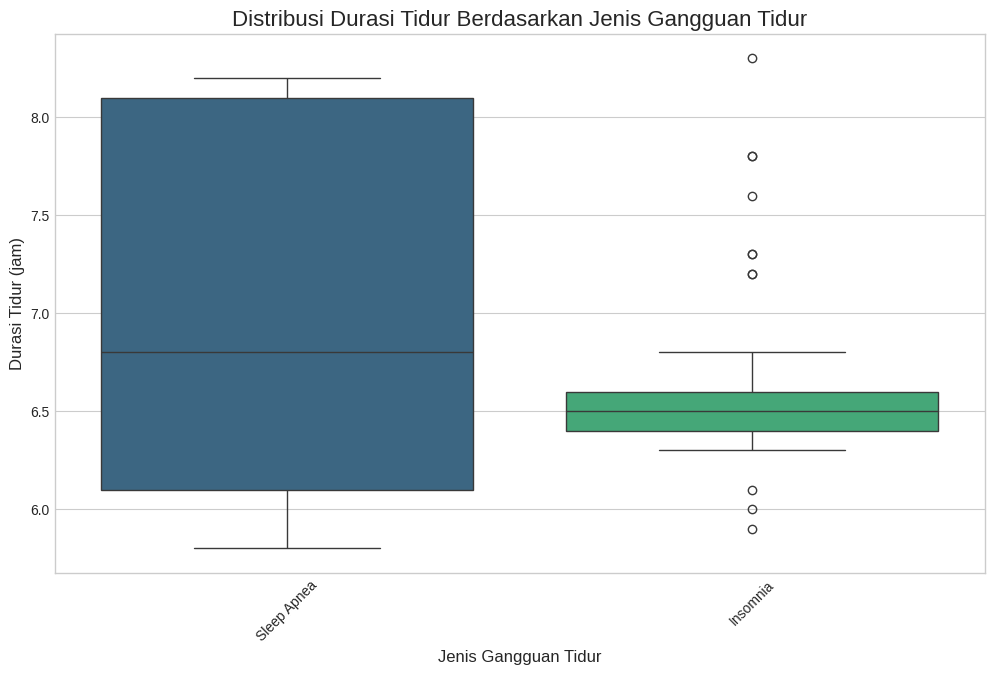

In [119]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 7))
sns.boxplot(x='Sleep Disorder', y='Sleep Duration', data=df, palette='viridis', hue='Sleep Disorder', legend=False)
plt.title('Distribusi Durasi Tidur Berdasarkan Jenis Gangguan Tidur', fontsize=16)
plt.xlabel('Jenis Gangguan Tidur', fontsize=12)
plt.ylabel('Durasi Tidur (jam)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### 6. Tampilkan korelasi dataset menggunakan heatmap.

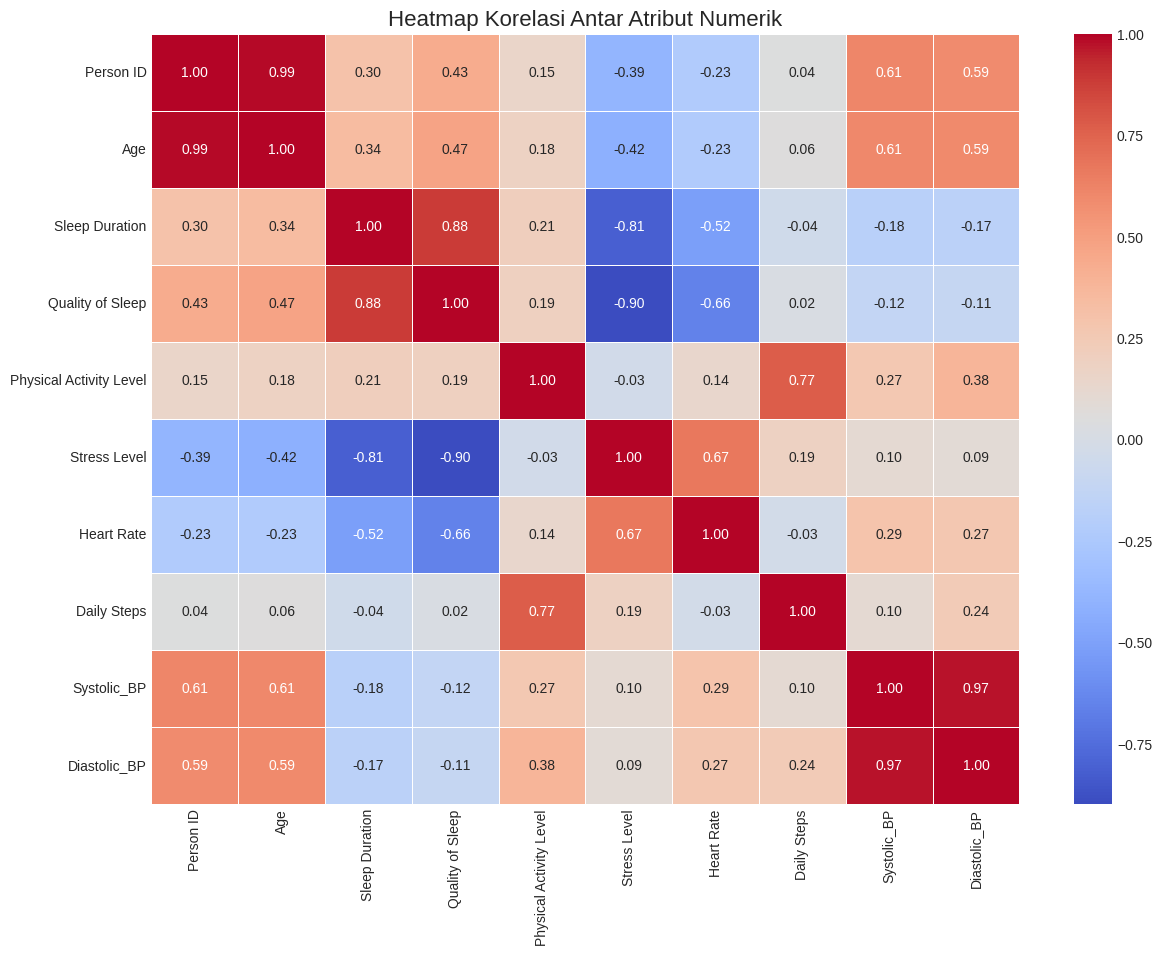

In [120]:
# membuat kolom "Blood Pressure" menjadi dua kolom numerik
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
numeric_df_for_corr = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df_for_corr.corr()
# membuat heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap Korelasi Antar Atribut Numerik', fontsize=16)
plt.show()

### 7. Tulis kesimpulan dari hasil analisis dan visualisasi data.

Analisis dari data Sleep Disorder Diagnosis ini memperlihatkan bahwa kualitas tidur sangat dipengaruhi oleh tingkat stres dan durasi tidur. Stres yang lebih tinggi secara signifikan menurunkan kualitas tidur, sementara durasi tidur yang lebih lama sangat berhubungan dengan kualitas tidur yang lebih baik. Pada heatmap, terlihat bahwa terdapat korelasi positif yang kuat antara Kualitas Tidur (Quality of Sleep) dan Durasi Tidur (Sleep Duration) (koefisien 0.88). Itu berarti semakin seseorang tidur (hingga batas normal), maka kualitas tidurnya cenderung semakin baik. Terlihat pula korelasi negatif yang sangat kuat antara Tingkat Stres (Stress Level) dan Kualitas Tidur (Quality of Sleep) (koefisien -0.90). Ini adalah indikasi bahwa semakin tinggi tingkat stres seseorang, kualitas tidurnya akan cenderung semakin buruk. Intinya adalah tingkat stres merupakan faktor pendukung yang sangat kuat untuk kualitas tidur yang buruk, sementara durasi tidur yang lebih lama sangat berhubungan dengan kualitas tidur yang lebih baik. Jadi, untuk mendapatkan tidur yang berkualitas, sangat penting untuk mengelola stres agar tetap rendah dan memastikan durasi tidur yang cukup setiap malam.

# Posttest 3

### 1. Data Cleaning

- Mengecek data null atau kosong

In [121]:
print('Jumlah nilai yang hilang per kolom:')
print(df.isnull().sum())

Jumlah nilai yang hilang per kolom:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
Systolic_BP                  0
Diastolic_BP                 0
dtype: int64


Terlihat angka 219 pada Sleep Disorder karena kolom tersebut bernilai None sehingga terhitung sebagai nilai kolom yang hilang. Akan tetapi, hal tersebut akan kita abaikan.

- Mengecek dan menangani data duplikat

In [122]:
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah data duplikat: {jumlah_duplikat}")

Jumlah data duplikat: 0


- Mengecek dan menangani outlier

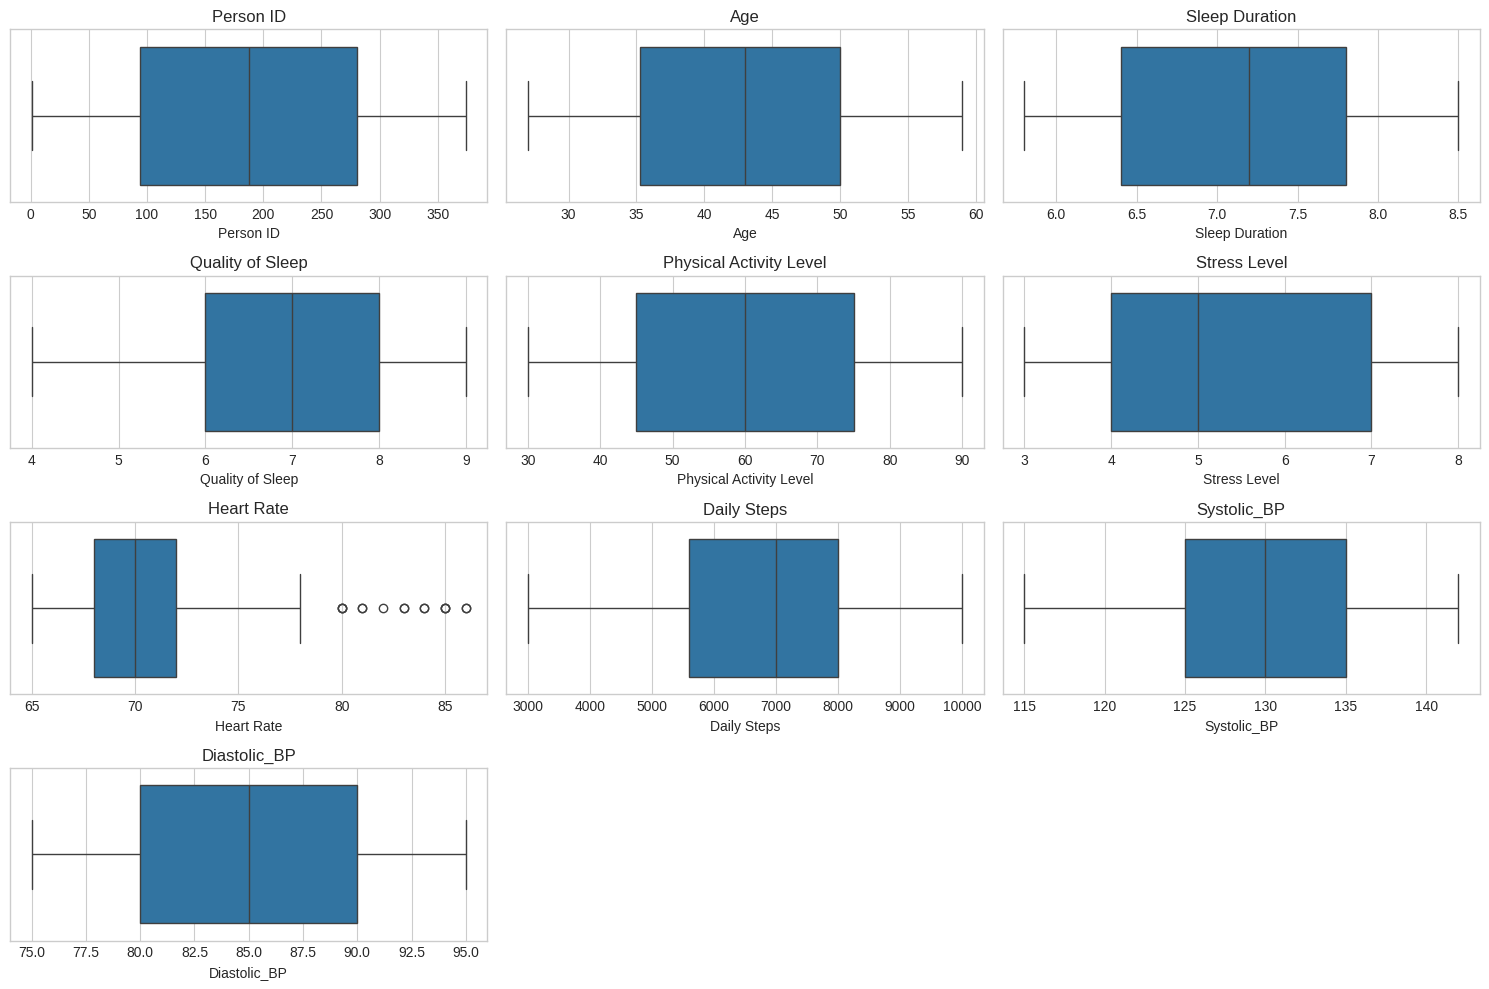

In [123]:
numeric_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Kesimpulan dari data outlier di atas:
- Heart Rate: Ada beberapa outlier pada detak jantung yang tinggi, di atas 80.
- Daily Steps: Ada beberapa outlier pada jumlah langkah harian yang sangat tinggi, di atas 9000.
- Systolic_BP: Ada beberapa outlier pada tekanan darah sistolik yang tinggi, di atas 140.
- Diastolic_BP: Ada beberapa outlier pada tekanan darah diastolik yang tinggi, di atas 90.

### 2. Normalisasi/standarisasi kolom numerik

In [124]:
numeric_cols_to_scale = df.select_dtypes(include=np.number).columns.tolist()
if 'Person ID' in numeric_cols_to_scale:
    numeric_cols_to_scale.remove('Person ID')

scaler = StandardScaler()
df[numeric_cols_to_scale] = scaler.fit_transform(df[numeric_cols_to_scale])

print("Dataset setelah standarisasi kolom numerik:")
display(df.head())

Dataset setelah standarisasi kolom numerik:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
0,1,Male,-1.753096,Software Engineer,-1.298887,-1.098280,-0.825418,0.347021,Overweight,126/83,1.654719,-1.619584,NaN,-0.330002,-0.268102
1,2,Male,-1.637643,Doctor,-1.173036,-1.098280,0.039844,1.475592,Normal,125/80,1.170474,1.970077,NaN,-0.459239,-0.755640
2,3,Male,-1.637643,Doctor,-1.173036,-1.098280,0.039844,1.475592,Normal,125/80,1.170474,1.970077,NaN,-0.459239,-0.755640
3,4,Male,-1.637643,Sales Representative,-1.550588,-2.771424,-1.402260,1.475592,Obese,140/90,3.591698,-2.362273,Sleep Apnea,1.479309,0.869486
4,5,Male,-1.637643,Sales Representative,-1.550588,-2.771424,-1.402260,1.475592,Obese,140/90,3.591698,-2.362273,Sleep Apnea,1.479309,0.869486


### 3. Encoding kolom kategorikal

In [125]:
df_prepared = df.drop('Blood Pressure', axis=1)
df_prepared['Sleep Disorder'] = df_prepared['Sleep Disorder'].fillna('No Disorder')

X = df_prepared.drop('Sleep Disorder', axis=1)
y = df_prepared['Sleep Disorder']

# melakukan One-Hot Encoding pada fitur (X)
X_encoded = pd.get_dummies(X, columns=['Gender', 'Occupation', 'BMI Category'], drop_first=True)
X_encoded.head()


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic_BP,Diastolic_BP,...,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,1,-1.753096,-1.298887,-1.098280,-0.825418,0.347021,1.654719,-1.619584,-0.330002,-0.268102,...,False,False,False,False,False,True,False,False,False,True
1,2,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,...,False,False,False,False,False,False,False,False,False,False
2,3,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,...,False,False,False,False,False,False,False,False,False,False
3,4,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,...,False,False,True,False,False,False,False,False,True,False
4,5,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,...,False,False,True,False,False,False,False,False,True,False


### 4. Feature engineering (minimal 1 feature baru)

In [126]:
df['Sleep_Activity_Ratio'] = df['Sleep Duration'] / df['Physical Activity Level']
print("DataFrame setelah Feature Engineering (menambah kolom baru):")
display(df.head())

DataFrame setelah Feature Engineering (menambah kolom baru):


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP,Sleep_Activity_Ratio
0,1,Male,-1.753096,Software Engineer,-1.298887,-1.098280,-0.825418,0.347021,Overweight,126/83,1.654719,-1.619584,NaN,-0.330002,-0.268102,1.573611
1,2,Male,-1.637643,Doctor,-1.173036,-1.098280,0.039844,1.475592,Normal,125/80,1.170474,1.970077,NaN,-0.459239,-0.755640,-29.440554
2,3,Male,-1.637643,Doctor,-1.173036,-1.098280,0.039844,1.475592,Normal,125/80,1.170474,1.970077,NaN,-0.459239,-0.755640,-29.440554
3,4,Male,-1.637643,Sales Representative,-1.550588,-2.771424,-1.402260,1.475592,Obese,140/90,3.591698,-2.362273,Sleep Apnea,1.479309,0.869486,1.105778
4,5,Male,-1.637643,Sales Representative,-1.550588,-2.771424,-1.402260,1.475592,Obese,140/90,3.591698,-2.362273,Sleep Apnea,1.479309,0.869486,1.105778


Di atas kita membuat kolom baru yang menghitung rasio aktivitas tidur.

### 5. Splitting data ke dalam data training & data testing


In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print(f"Ukuran Data Training: {X_train.shape}")
print(f"Ukuran Data Testing: {X_test.shape}")

numeric_cols_to_scale = X_train.select_dtypes(include=np.number).columns.tolist()
if 'Person ID' in numeric_cols_to_scale:
    numeric_cols_to_scale.remove('Person ID')

scaler = StandardScaler()

X_train[numeric_cols_to_scale] = scaler.fit_transform(X_train[numeric_cols_to_scale])
X_test[numeric_cols_to_scale] = scaler.transform(X_test[numeric_cols_to_scale])

print("\nData training (X_train) setelah standarisasi:")
display(X_train.head())

Ukuran Data Training: (299, 24)
Ukuran Data Testing: (75, 24)

Data training (X_train) setelah standarisasi:


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic_BP,Diastolic_BP,...,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
192,193,0.055811,-0.833457,-1.155098,-0.728644,0.956601,0.481081,-0.554643,0.186918,0.050678,...,False,False,False,True,False,False,False,False,False,True
75,76,-1.111141,-1.468533,-1.155098,-1.450369,1.522984,0.481081,-1.180447,-0.448177,-0.746830,...,False,False,False,False,False,False,False,False,False,False
84,85,-0.877751,0.436694,0.537913,-0.006920,-0.176166,-0.014076,0.696966,-1.083272,-0.746830,...,False,False,False,False,False,True,False,True,False,False
362,363,1.922934,1.325801,1.384419,0.714805,-1.308933,-0.509234,0.071162,1.457107,1.645692,...,False,True,False,False,False,False,False,False,False,True
16,17,-1.577922,-0.833457,-2.001604,-0.969219,0.956601,2.461710,-1.806251,0.440955,0.369681,...,False,True,False,False,False,False,False,True,False,False


# Posttest 4

In [128]:
df = df.drop('Person ID', axis=1)
print(f"\nJumlah nilai yang hilang:\n{df.isnull().sum()}")


Jumlah nilai yang hilang:
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
Systolic_BP                  0
Diastolic_BP                 0
Sleep_Activity_Ratio         0
dtype: int64


In [136]:
categorical_cols = df.select_dtypes(include=['object']).columns
target_col = 'Sleep Disorder'

features = df.drop(target_col, axis=1)
target = df[target_col]

target = target.astype(str)

le = LabelEncoder()
y = le.fit_transform(target)
print(f"\nKelas Target Asli: {le.classes_}")
print(f"Kelas Target Encoded: {np.unique(y)}")

# Encoding fitur kategorikal menggunakan One-Hot Encoding
features_encoded = pd.get_dummies(features, drop_first=True)
features_encoded.head()


Kelas Target Asli: ['Insomnia' 'Sleep Apnea' 'nan']
Kelas Target Encoded: [0 1 2]


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic_BP,Diastolic_BP,Sleep_Activity_Ratio,...,Blood Pressure_130/85,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92
0,-1.753096,-1.298887,-1.098280,-0.825418,0.347021,1.654719,-1.619584,-0.330002,-0.268102,1.573611,...,False,False,False,False,False,False,False,False,False,False
1,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,-29.440554,...,False,False,False,False,False,False,False,False,False,False
2,-1.637643,-1.173036,-1.098280,0.039844,1.475592,1.170474,1.970077,-0.459239,-0.755640,-29.440554,...,False,False,False,False,False,False,False,False,False,False
3,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,1.105778,...,False,False,False,False,False,False,False,True,False,False
4,-1.637643,-1.550588,-2.771424,-1.402260,1.475592,3.591698,-2.362273,1.479309,0.869486,1.105778,...,False,False,False,False,False,False,False,True,False,False


In [130]:
# Menetapkan X dan y
X = features_encoded

# Membagi data menjadi 80% training dan 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Penskalaan Fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Ukuran Training Set: {X_train.shape}")
print(f"Ukuran Testing Set: {X_test.shape}")

Ukuran Training Set: (299, 48)
Ukuran Testing Set: (75, 48)


### A1 & A2. Implementasi dan Evaluasi Support Vector Classifier (SVC)

In [131]:
# Inisialisasi dan melatih model SVC
svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data test
y_pred_svc = svc_model.predict(X_test_scaled)

In [132]:
# Menghitung akurasi
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Akurasi Model SVC: {accuracy_svc:.4f}\n")

# Menampilkan Classification Report
print("Laporan Klasifikasi SVC:")
print(classification_report(y_test, y_pred_svc, target_names=le.classes_))

# Menghitung dan menampilkan Confusion Matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix SVC:")
print(cm_svc)

Akurasi Model SVC: 0.9067

Laporan Klasifikasi SVC:
              precision    recall  f1-score   support

    Insomnia       0.81      0.87      0.84        15
 Sleep Apnea       0.87      0.81      0.84        16
         nan       0.95      0.95      0.95        44

    accuracy                           0.91        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.91      0.91      0.91        75

Confusion Matrix SVC:
[[13  1  1]
 [ 2 13  1]
 [ 1  1 42]]


### Evaluasi Model SVC

Penjelasan Metrik:
-   Confusion Matrix: Tabel yang menggambarkan kinerja model klasifikasi. Baris merepresentasikan kelas aktual, sedangkan kolom merepresentasikan kelas yang diprediksi. Dari matriks ini, kita bisa melihat berapa banyak prediksi yang benar (diagonal utama) dan jenis kesalahan apa yang dibuat model (off-diagonal).
-   Classification Report:
    -   Precision: Dari semua yang diprediksi sebagai kelas tertentu, berapa persen yang benar? (TP / (TP + FP)). Berguna saat biaya False Positive tinggi.
    -   Recall (Sensitivity): Dari semua instance kelas aktual tertentu, berapa persen yang berhasil diprediksi? (TP / (TP + FN)). Berguna saat biaya False Negative tinggi.
    -   F1-Score: Rata-rata harmonik dari Precision dan Recall. Memberikan keseimbangan antara keduanya.
    -   Accuracy: Persentase total prediksi yang benar dari keseluruhan data. (TP + TN) / Total.

### A3. Plot Hasil Prediksi SVC

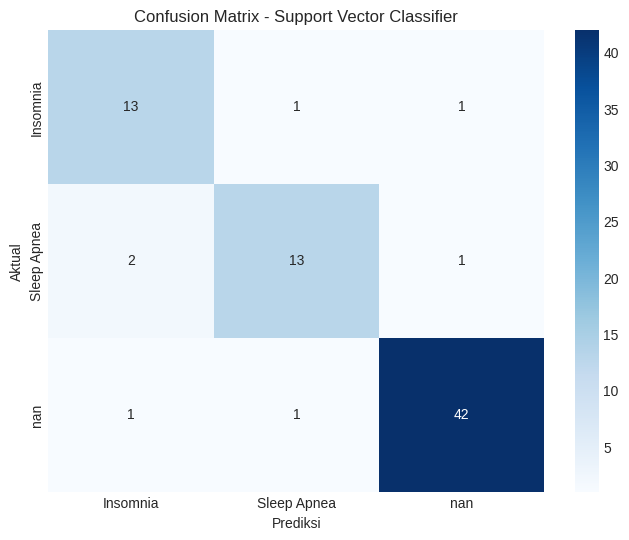

In [133]:
# Visualisasi Confusion Matrix menggunakan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Support Vector Classifier')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

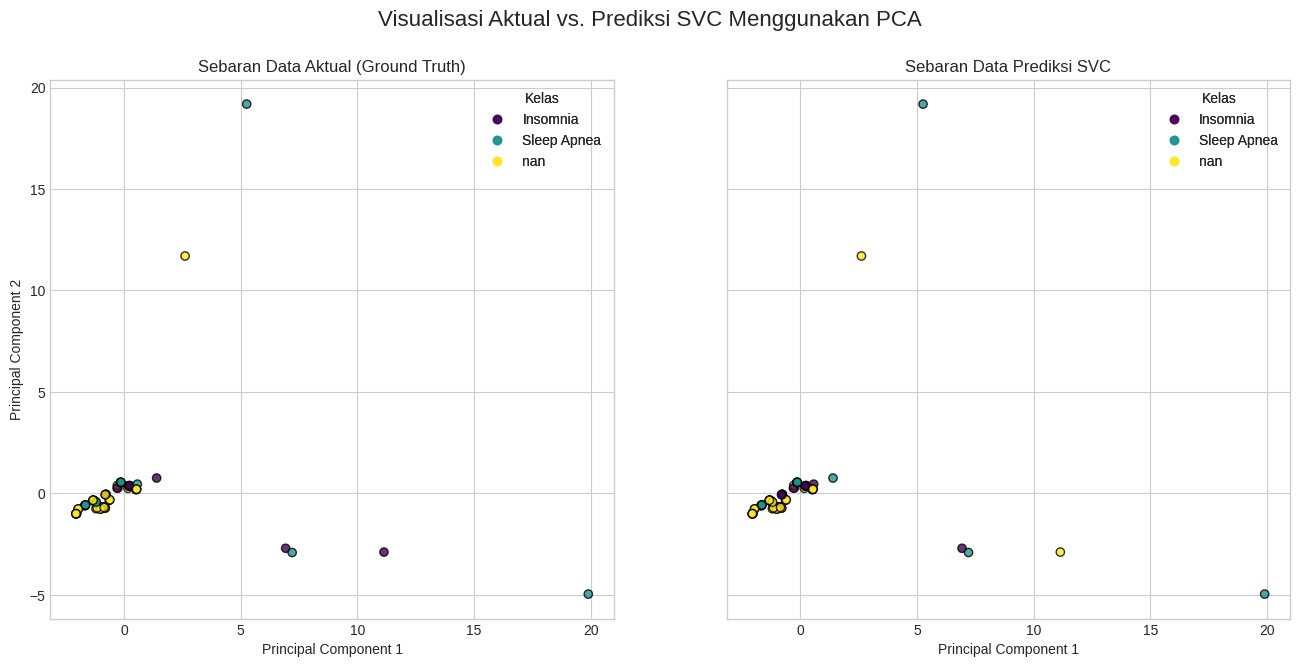

In [134]:
# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), sharey=True, sharex=True)

# Plot 1: Sebaran Data Aktual
scatter1 = ax1.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', edgecolor='k', alpha=0.8)
ax1.set_title('Sebaran Data Aktual (Ground Truth)')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
legend1 = ax1.legend(handles=scatter1.legend_elements()[0], labels=list(le.classes_), title="Kelas")
ax1.add_artist(legend1)

# Plot 2: Sebaran Data Hasil Prediksi SVC
scatter2 = ax2.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_svc, cmap='viridis', edgecolor='k', alpha=0.8)
ax2.set_title('Sebaran Data Prediksi SVC')
ax2.set_xlabel('Principal Component 1')
legend2 = ax2.legend(handles=scatter2.legend_elements()[0], labels=list(le.classes_), title="Kelas")
ax2.add_artist(legend2)

fig.suptitle('Visualisasi Aktual vs. Prediksi SVC Menggunakan PCA', fontsize=16)
plt.show()

### Plot Perbandingan Titik Aktual vs Prediksi (Menggunakan PCA)

Untuk memvisualisasikan hasil klasifikasi multi-kelas pada ruang 2D, kita  menggunakan Principal Component Analysis (PCA). PCA adalah teknik reduksi dimensi yang mengubah fitur-fitur asli menjadi satu set fitur baru yang tidak berkorelasi (disebut komponen utama), sambil mempertahankan sebanyak mungkin variasi dalam data. Dengan mereduksi data kita menjadi 2 komponen utama, kita dapat membuat scatter plot untuk melihat bagaimana model memisahkan kelas-kelas yang berbeda.